In [124]:
# Import required libraries and dependencies

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
n

In [125]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
print("Available columns in DataFrame:", df.columns)
# Display sample data
market_data_df.head(10)
import os



Available columns in DataFrame: Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [126]:
# Generate summary statistics
market_data_df.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

### Prepare the Data

In [127]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df = market_data_df
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Apply the scaler to the numeric columns

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.columns)
print("Available columns in DataFrame:", df.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')
Available columns in DataFrame: Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [128]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(df[numeric_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Copy the crypto names from the original data
crypto_df = pd.read_csv(file_path)
crypto_names = crypto_df['coin_id']
print(crypto_names.head())

# Extract the 'coin_id' column (crypto names) from the DataFrame
crypto_names = crypto_df['coin_id']

# Display the first few crypto name
crypto_names.head()



# Set the coinid column as index
crypto_df.set_index('coin_id', inplace=True)

# Display sample data

crypto_df.sample(5)


0         bitcoin
1        ethereum
2          tether
3          ripple
4    bitcoin-cash
Name: coin_id, dtype: object


price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin-cash                      2.90585                    17.09717   
true-usd                         -0.06197                     0.16642   
ontology                         -1.35845                    -1.21399   
maker                            -0.60285                     8.15400   
bitcoin                           1.08388                     7.60278   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin-cash                     14.75334                     15.74903   
true-usd                          0.10974                      0.03090   
ontology                        -10.56222                    -34.70548   
maker                            -1.48854                     16.71360   
bitcoin                           6.57509                      7.67258   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin-cash                    -13.71793                      21.66042   
true-usd                          0.25154                      -0.08874   
ontology                        -32.70004                      54.76717   
maker                           -18.61722                      82.53544   
bitcoin                          -3.25185                      83.51840   

              price_change_percentage_1y  
coin_id                                   
bitcoin-cash                    14.49384  
true-usd                         0.40617  
ontology                       -12.65493  
maker                           10.65279  
bitcoin                         37.51761

### Find the Best Value for k Using the Original Scaled DataFrame.

In [129]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_data)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(k_values),
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
# Display the DataFrame
elbow_df
#import ace_tools as tools; tools.display_dataframe_to_user(name="Elbow Curve Data", dataframe=elbow_df)

C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044

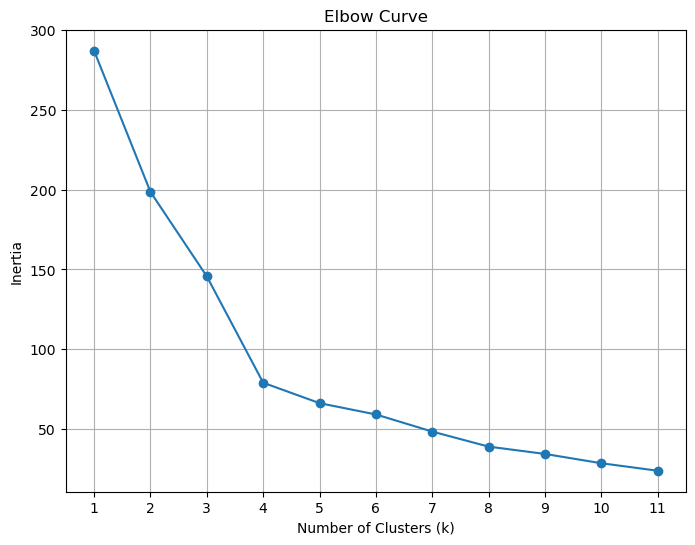

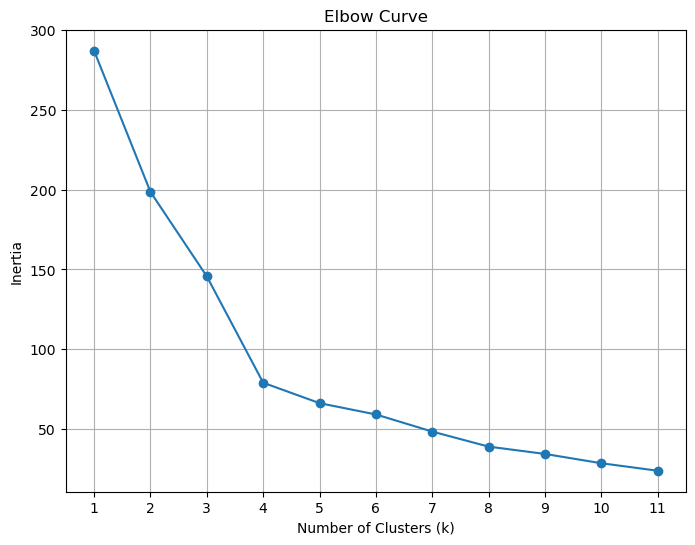

In [130]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 or 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [131]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=0)


In [132]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data)

C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [133]:
# Predict the clusters to group the cryptocurrencies using the scaled data

cluster_predictions = kmeans_model.predict(scaled_data)
# View the resulting array of cluster values.
cluster_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [134]:
# Create a copy of the DataFrame
crypto_df_copy = crypto_df.copy()

In [135]:
# Add a new column to the DataFrame with the predicted clusters
crypto_df_copy['Predicted_Cluster'] = cluster_predictions
# Display sample data
cluster_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

<Axes: title={'center': 'Scatter Plot of Cryptocurrencies by Clusters (Rainbow Colors)'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

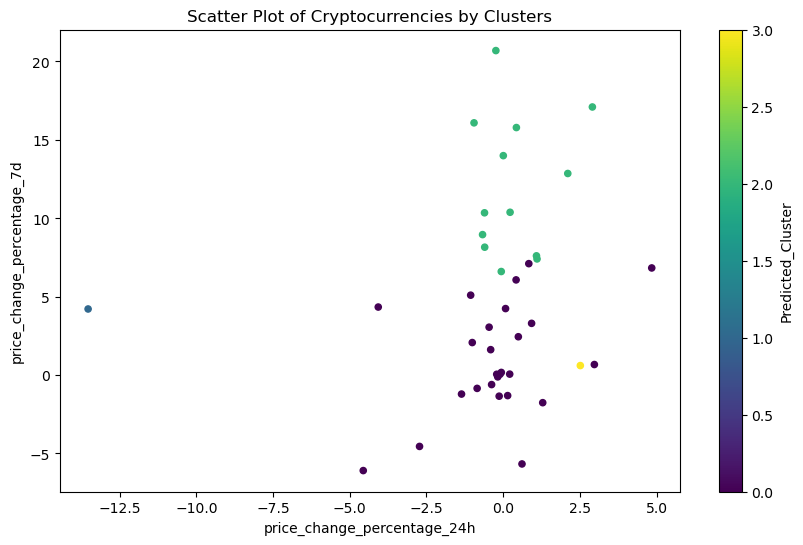

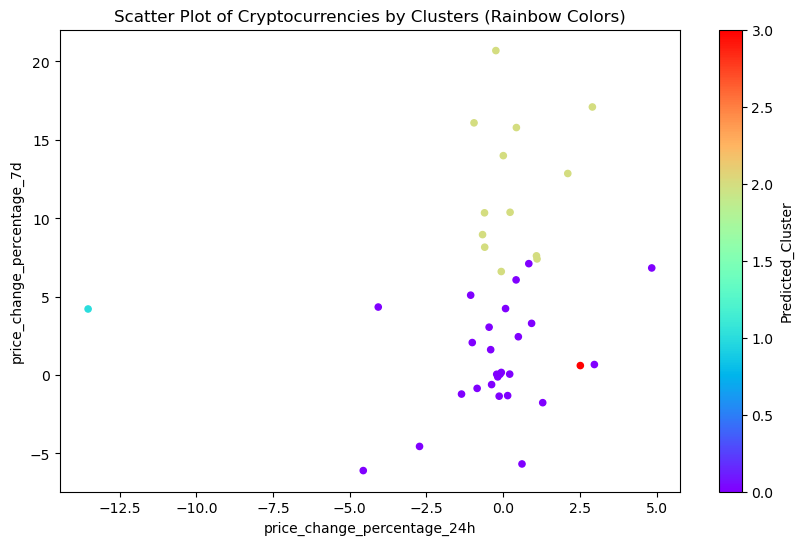

In [136]:
# Create a scatter plot using Pandas plot by setting crypto_df_copy.plot.scatter(
crypto_df_copy.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Predicted_Cluster',
    colormap='viridis',
    figsize=(10, 6),
    title='Scatter Plot of Cryptocurrencies by Clusters'
)

#`x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_df_copy.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Predicted_Cluster',
    colormap='rainbow',
    figsize=(10, 6),
    title='Scatter Plot of Cryptocurrencies by Clusters (Rainbow Colors)'
)


### Optimize Clusters with Principal Component Analysis.

In [137]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [138]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=crypto_df.index)
pca_data = pca_model.fit_transform(scaled_data)

# View the first five rows of the DataFrame. 
pca_df.head()

PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

In [139]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
1.	PCA1: 97.60% of the variance
2.	PCA2: 2.30% of the variance
3.	PCA3: 0.07% of the variance


In [154]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Copy the crypto names from the original data
pca_df['coin_id'] = crypto_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

### Find the Best Value for k Using the PCA Data
The inertia drops sharply for k == 1 to k == 4.
After k == 4, the decrease in inertia flattens significantly
This suggests that the best value  for K is around 4.


In [155]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = range(1, 12)
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)
    
print(len(k_values), len(inertia_values))

# 1. Create a KMeans model using the loop counter for the n_clusters
k_models = {}
for k in range(1, 12):
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # Fit the model to the PCA DataFrame
    kmeans.fit(pca_df)
    k_models[k] = kmeans


# 2. Fit the model to the data using PCA DataFrame.
kmeans_pca.fit(pca_df)
# 3. Append the model.inertia_ to the inertia list

inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    "k": list(k_values),
    "inertia": inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

11 11


ValueError: All arrays must be of the same length

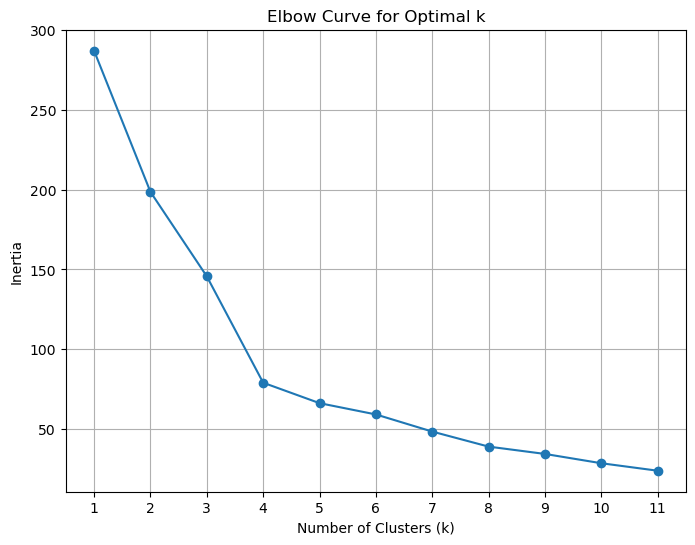

In [156]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA datais 4 or 5, as indicated by the Elbow Curve. The inertia significantly upto k == 4. and then the decrease flattens.

  * 


* **Question:** Does it differ from the best k value found using the original data?

  * **AnswNo, the best k value is consistent between the PCA transformed data and the original data. In both cases the optimal k appears to be around 4 or 5 based on the elbow curve.er:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [157]:
# Initialize the K-Means model using the best value for k

best_k = 4
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)



In [158]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

C:\Users\patri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [159]:
# Predict the clusters to group the cryptocurrencies using the PCA data

cluster_predictions = kmeans_pca.predict(pca_df)
# Print the resulting array of cluster values.
cluster_predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [160]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = cluster_predictions

# Display sample data
pca_df_copy.head()

PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2

In [161]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

scatter_plot = pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",
    cmap="Category10",
    title="PCA Scatter Plot by Cluster",
    size=10,
    hover_cols=["PCA1", "PCA2", "Cluster"]
)

scatter_plot

:Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [162]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_with_original_index = pd.DataFrame(
    data=pca_data,
    columns=["PCA1", "PCA2", "PCA3"],
    index=crypto_df.index  # Use the original DataFrame's index
)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PCA1
    

In [163]:
# Create a DataFrame for PCA loadings
loadings = pd.DataFrame(
    data=pca_model.components_,
    columns=crypto_df.columns,  # Use the column names from the original DataFrame
    index=["PCA1", "PCA2", "PCA3"]  # Name the components
)

# Identify features with the strongest positive and negative influence for each component
strongest_influences = loadings.apply(
    lambda x: pd.Series({
        "Most_Positive_Feature": x.idxmax(),
        "Positive_Loading": x.max(),
        "Most_Negative_Feature": x.idxmin(),
        "Negative_Loading": x.min()
    }),
    axis=1
)

# Display the strongest influences
print(strongest_influences)

             Most_Positive_Feature  Positive_Loading  \
PCA1  price_change_percentage_200d          0.594468   
PCA2   price_change_percentage_30d          0.562182   
PCA3    price_change_percentage_7d          0.787670   

            Most_Negative_Feature  Negative_Loading  
PCA1  price_change_percentage_24h         -0.416728  
PCA2   price_change_percentage_1y         -0.150789  
PCA3  price_change_percentage_60d         -0.361377  
